In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as ltb
from tpot import TPOTClassifier

C:\Users\user\anaconda3\envs\MLComp\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [33]:
#loading data set
test=pd.read_csv("./test.csv")
train=pd.read_csv("./train.csv")
train_m,train_n=train.shape
print(train_m,train_n)
test_m,test_n = test.shape
print(test_m,test_n)
print(train.head(10))
train.columns

18834 11
8072 9
       pet_id           issue_date         listing_date  condition  \
0  ANSL_69903  2016-07-10 00:00:00  2016-09-21 16:25:00        2.0   
1  ANSL_66892  2013-11-21 00:00:00  2018-12-27 17:47:00        1.0   
2  ANSL_69750  2014-09-28 00:00:00  2016-10-19 08:24:00        NaN   
3  ANSL_71623  2016-12-31 00:00:00  2019-01-25 18:30:00        1.0   
4  ANSL_57969  2017-09-28 00:00:00  2017-11-19 09:38:00        2.0   
5  ANSL_52200  2017-10-25 00:00:00  2019-03-10 13:18:00        0.0   
6  ANSL_75444  2018-11-06 00:00:00  2019-04-09 16:00:00        2.0   
7  ANSL_52759  2018-06-05 00:00:00  2018-09-02 17:04:00        0.0   
8  ANSL_74632  2015-10-10 00:00:00  2016-08-04 16:29:00        2.0   
9  ANSL_56464  2014-02-18 00:00:00  2017-03-17 11:38:00        2.0   

    color_type  length(m)  height(cm)  X1  X2  breed_category  pet_category  
0  Brown Tabby       0.80        7.78  13   9             0.0             1  
1        White       0.72       14.19  13   9            

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

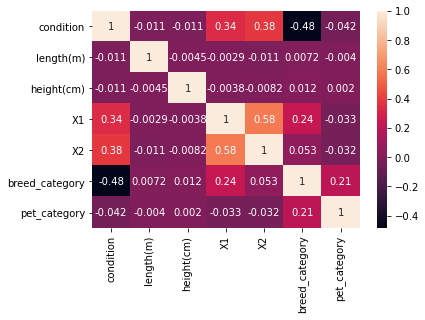

In [19]:
#correlation matrix
corrmatrix = train.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [38]:
label_encoder = preprocessing.LabelEncoder()
train['color_type']= label_encoder.fit_transform(train['color_type'])
test['color_type']= label_encoder.transform(test['color_type'])
print(train['color_type'])

0        18
1        53
2        15
3        53
4         2
         ..
18829    52
18830    15
18831    22
18832    48
18833    15
Name: color_type, Length: 18834, dtype: int32


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp=imp.fit(train)
train=imp.transform(train)

In [39]:
#data preprocessing 
X = train.drop(["pet_id","issue_date","listing_date","breed_category","pet_category"],axis=1) 
y = train[["breed_category","pet_category"]]

In [40]:
test_X = test.drop(["pet_id","issue_date","listing_date"],axis=1)

In [41]:
X_train, X_vald, y_train, y_vald = sklearn.model_selection.train_test_split(X, y, 
                                                    test_size = 0.2, random_state=0)

In [42]:
y1_train = y_train[["breed_category"]]
y2_train = y_train[["pet_category"]]
y1_vald = y_vald[["breed_category"]]
y2_vald = y_vald[["pet_category"]]


In [11]:
#model 1
model1 = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model1.fit(X_train,y1_train)
y1_pred1 = regressor.predict(X_vald)
acc1 =metrics.accuracy_score(y1_vald, y1_pred1)
print(acc1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [45]:
#model2-XGboost
classifier2 = ltb.LGBMClassifier(objective ="multi:softmax")
classifier2.fit(X_train, y1_train)

y1_pred2 = classifier2.predict(X_vald)

result12 = accuracy_score(y1_vald,y1_pred2)
print("Accuracy:",result12)
y1_pred= classifier2.predict(test_X)
classifier2.fit(X_train, y2_train)

y2_pred2 = classifier2.predict(X_vald)

result22 = accuracy_score(y2_vald,y2_pred2)
print("Accuracy:",result22)
y2_pred= classifier2.predict(test_X)
s1 =f1_score(y1_vald, y1_pred2, average='weighted')
s2 =f1_score(y2_vald, y2_pred2, average='weighted')
print("F1 score:",s1)
print("F1 score:",s2)


Accuracy: 0.9049641624634988
Accuracy: 0.8736395009291213
F1 score: 0.9049378076951136
F1 score: 0.8710979638014261


In [46]:
#submission


submission = pd.DataFrame({"pet_id":test["pet_id"],"breed_category":y1_pred,"pet_category":y2_pred})
submission.to_csv("submission1.csv",index=False)

In [ ]:
#model 3 tpot
classifier3 = TPOTClassifier()
classifier3.fit(X_train, y1_train)

y1_pred2 = classifier3.predict(X_vald)

result12 = accuracy_score(y1_vald,y1_pred2)
print("Accuracy:",result12)
y1_pred= classifier3.predict(test_X)
classifier2.fit(X_train, y2_train)

y2_pred2 = classifier3.predict(X_vald)

result22 = accuracy_score(y2_vald,y2_pred2)
print("Accuracy:",result22)
y2_pred= classifier3.predict(test_X)
s1 =f1_score(y1_vald, y1_pred2, average='weighted')
s2 =f1_score(y2_vald, y2_pred2, average='weighted')
print("F1 score:",s1)
print("F1 score:",s2)


C:\Users\user\anaconda3\envs\MLComp\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
